In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

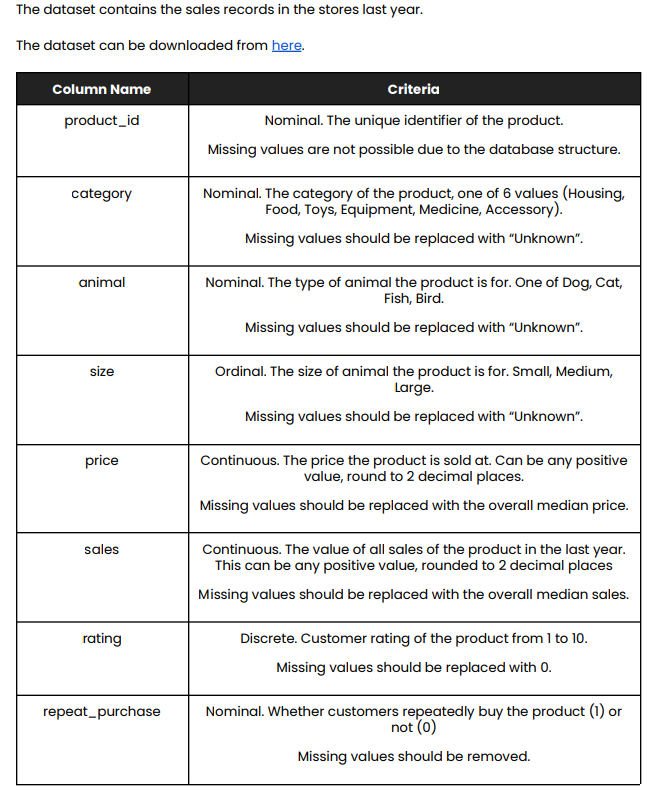


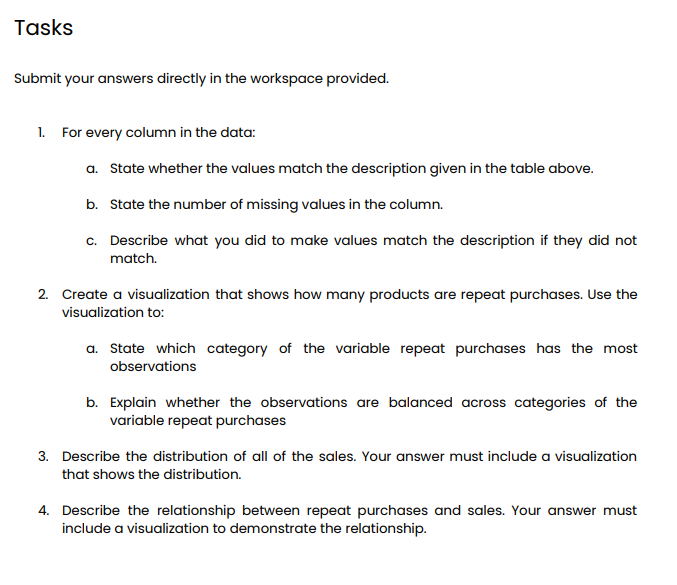

In [3]:
pet_file=pd.read_csv('C:\\Users\\Sagyntay\\Downloads\\Practical exam\\pet_supplies_2212.csv')

# Task1

In [4]:
pet_file

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [5]:
pet_file[pet_file['product_id']==21]

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,unlisted,542.06,NaN,0


## 1) We need to change the data type of price to float with rounding to 2 decimal places 

## the issue when I tried to change the data type of the column price, we found that there is a word instead of a numeric value 'unlisted'. So, I guess we need to replace this item with median value. 


In [6]:
pet_file.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [7]:
# convert column to numeric values, specifically for errors / string we used errors = 'coerce'
# pd.to_numeric() function converts the column to numeric values. It converts string values to NaNs
pet_file['price']=pd.to_numeric(pet_file['price'], errors = 'coerce')


In [8]:
# Finding median value for price column 
median_price=pet_file['price'].median()
median_price

28.064999999999998

In [9]:
pet_file[pet_file['product_id']==21]

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,NaN,542.06,NaN,0


In [10]:
# replacing missing values with median 
pet_file['price'].fillna(median_price, inplace=True)

In [11]:
# convert price column to float64 from object
pet_file['price'] = pet_file['price'].astype(float)

In [12]:
# rounding values to 2 decimal places in the column "price"
pet_file['price'] = round(pet_file['price'], 2)

In [13]:
pet_file[pet_file['product_id']==21]

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,28.06,542.06,NaN,0


In [14]:
pet_file.dtypes

product_id           int64
category            object
animal              object
size                object
price              float64
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [15]:
## 2) Let's also change the column "sales" decimal places to 2 as per instruction 
pet_file['sales']=round(pet_file['sales'], 2)
pet_file['sales']

0       1860.62
1        963.60
2        898.30
3        982.15
4        832.63
         ...   
1495    1203.36
1496    1099.97
1497     724.02
1498     658.66
1499     826.08
Name: sales, Length: 1500, dtype: float64

# Data Validation 

In [16]:
[pet_file[col_name].unique() for col_name in pet_file.columns]

[array([   1,    2,    3, ..., 1498, 1499, 1500], dtype=int64),
 array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
        '-'], dtype=object),
 array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object),
 array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
        'Medium', 'LARGE'], dtype=object),
 array([51.1 , 35.98, 31.23, 24.95, 26.18, 30.77, 31.04, 28.9 , 17.82,
        24.93, 40.87, 34.96, 31.07, 40.8 , 33.13, 43.09, 28.29, 43.91,
        33.87, 44.  , 28.06, 41.  , 32.98, 22.99, 38.99, 45.83, 28.24,
        28.19, 27.79, 38.86, 22.89, 26.07, 28.02, 23.99, 28.25, 30.87,
        28.09, 29.01, 26.13, 54.03, 31.2 , 30.92, 20.95, 17.98, 27.7 ,
        24.8 , 31.09, 19.83, 33.15, 21.25, 38.06, 30.89, 35.04, 26.03,
        33.94, 25.81, 32.99, 17.9 , 30.96, 40.93, 24.98, 26.08, 23.08,
        26.  , 22.95, 39.03, 23.19, 31.  , 21.05, 31.5 , 24.7 , 27.76,
        18.06, 28.43, 43.99, 41.03, 28.28, 25.96, 27.86, 38.95, 36.22,
        23.02, 21.14, 42.

In [17]:
# Filter the DataFrame for object columns
non_numeric = pet_file.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in category column:  7
Number of unique values in animal column:  4
Number of unique values in size column:  9


## 3) Here we found another issue with other columns. The column "Category" has extra value. This colum should have 6, but now it has 7 values. The extra value is a sign "-". As stated in the instruction, we will change these values to a word "Unknown". 

In [20]:
pet_file[pet_file['category']=="-"]

,product_id,category,animal,size,price,sales,rating,repeat_purchase
22,23,-,Bird,MEDIUM,32.98,859.94,3.0,0
72,73,-,Dog,small,33.13,1101.89,4.0,0
173,174,-,Bird,large,51.10,1868.47,5.0,0
178,179,-,Bird,large,50.99,1855.16,5.0,1
232,233,-,Cat,small,27.74,1024.25,6.0,1
267,268,-,Fish,Small,23.12,708.32,4.0,1
343,344,-,Cat,small,27.78,1026.38,6.0,0
369,370,-,Dog,large,28.06,1462.67,NaN,1
426,427,-,Cat,medium,28.06,1080.53,NaN,0
593,594,-,Fish,Medium,17.95,509.93,5.0,1


In [21]:
## We use the replace() method of a pandas DataFrame
pet_file['category']=pet_file['category'].replace('-', 'Unknown')

In [22]:
## we have changed the extra values to "Uknown" as per instruction 
pet_file['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

## 4) Another issue is with the column "Size". It should have 3 unique values, but now it has 9. It's due to different input ways. So, we will change all these values into standardized values as per instruction

In [23]:
pet_file['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [24]:
# standardizing differnt inputs of size values 
pet_file['size'] = pet_file['size'].str.lower().replace({'small': 'Small', 'medium': 'Medium', 'large':'Large'})
pet_file['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [25]:
pet_file['size']

0        Large
1       Medium
2       Medium
3        Small
4        Small
         ...  
1495    Medium
1496     Small
1497     Small
1498     Small
1499    Medium
Name: size, Length: 1500, dtype: object

In [26]:
# Filter the DataFrame for object columns
non_numeric = pet_file.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in category column:  7
Number of unique values in animal column:  4
Number of unique values in size column:  3


## Now all the categorical columns are correct. Let's check the missing values in each columns

In [27]:
print(pet_file.isna().sum())
# shows number of missing values per column

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64


## 5) As we can see there are 150 missing values in the column "rating". We need to replace those missing values with "0". 

In [28]:
# replacing missing values in the column "rating" with 0
pet_file['rating'].fillna(0, inplace=True)

In [29]:
# shows number of missing values per column
print(pet_file.isna().sum())

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64


In [30]:
## 6) Also, for this column we need to change the data type from float to integer.
pet_file['rating']=pet_file['rating'].astype(int)

In [31]:
pet_file.dtypes

product_id           int64
category            object
animal              object
size                object
price              float64
sales              float64
rating               int32
repeat_purchase      int64
dtype: object

In [32]:
pet_file['repeat_purchase'].unique()

array([1, 0], dtype=int64)

In [33]:
pet_file.describe()

,product_id,price,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,29.287873,996.597847,4.492000,0.604000
std,433.157015,7.335833,323.952676,2.105443,0.489228
min,1.000000,12.850000,286.940000,0.000000,0.000000
25%,375.750000,25.000000,747.420000,3.000000,0.000000
50%,750.500000,28.060000,1000.830000,5.000000,1.000000
75%,1125.250000,33.142500,1158.157500,6.000000,1.000000
max,1500.000000,54.160000,2255.960000,9.000000,1.000000


In [34]:
pet_file.to_excel('C:\\Users\\Sagyntay\\Downloads\\Practical exam\\pet_supplies_Zhandos.xlsx')

In [46]:
pet_file.groupby('category')['sales'].agg(['mean', 'median'])

,mean,median
category,,
Accessory,962.487619,997.115
Equipment,942.906054,1028.285
Food,1104.377538,1068.515
Housing,772.380220,783.840
Medicine,903.233122,941.390
Toys,1254.498431,1341.720
Unknown,1132.650800,1085.020


In [47]:
pet_file.groupby('category')['price'].agg(['mean', 'median'])

,mean,median
category,,
Accessory,31.344603,32.985
Equipment,26.959838,27.970
Food,33.687231,31.075
Housing,26.516079,26.010
Medicine,25.069072,24.980
Toys,33.262549,33.910
Unknown,32.244000,28.100


# Task 2 
## Create a visualization that shows how many products are repeat purchases. Use thevisualization to:
### a. State which category of the variable repeat purchases has the most observations
### b. Explain whether the observations are balanced across categories of the variable repeat purchases

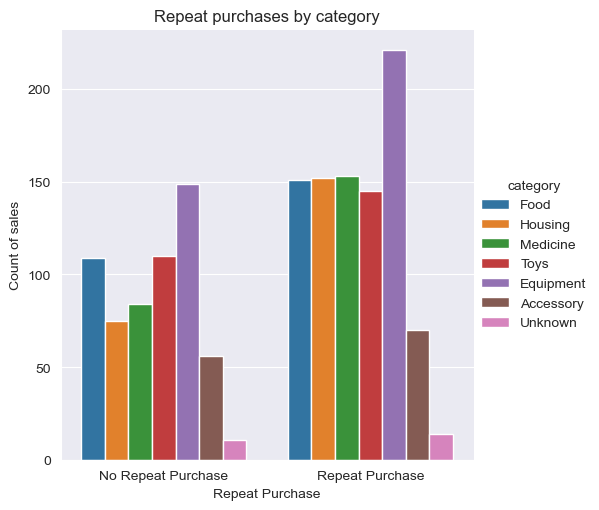

In [45]:
sns.set_style('darkgrid')
sns.catplot(x='repeat_purchase',
            data=pet_file,
            kind='count',
           hue='category') 
plt.xticks([0, 1], ['No Repeat Purchase', 'Repeat Purchase'])
plt.xlabel('Repeat Purchase')
plt.ylabel('Count of sales')
plt.title('Repeat purchases by category')


plt.show()

## a) As we can see from the bar plot, the most observations for repeat purchases among categories belong to the category "Equipment"

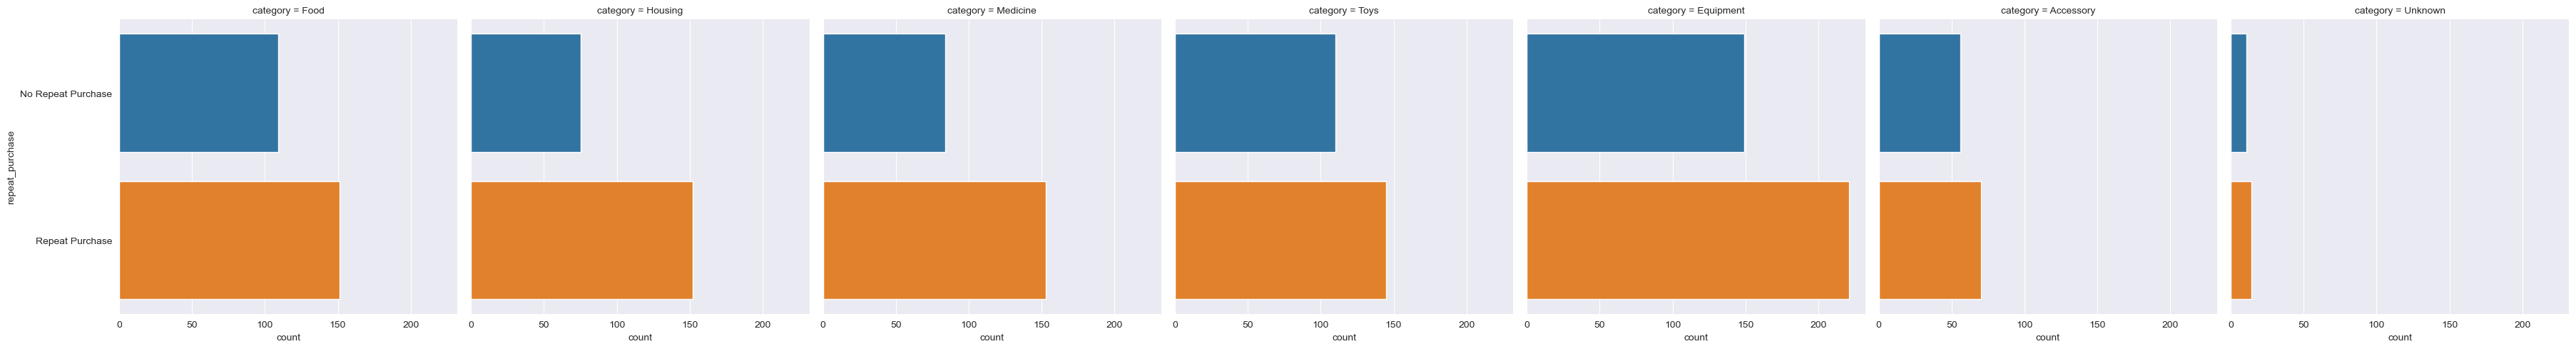

In [38]:
# Separate into column subplots based on age category
sns.catplot(y="repeat_purchase", data=pet_file,
            kind="count",
            col='category')
plt.yticks([0, 1], ['No Repeat Purchase', 'Repeat Purchase'])
# Show plot
plt.show()

### b) There are six possible categories included in this data. The category with the most observations in the variable repeat purchases is "equipment", with "medicine" being second having 60-70 less repeat items. Except categories "Equipment" and "Accessory", overall, the observations of the variable repeat purchases are balanced for the majority of categories. These categories are "Food", "Housing", "Medicine", and "Toys" with their repeat purchases variable ranging between 140-150. The "Equipment" category has more repeat purcahses than any other category with more 200 repeat purchases. "Accessory" category has the lowest repeat orders comparing to other categories at around 60-70 repeat purchases. 

# Task 3
## Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

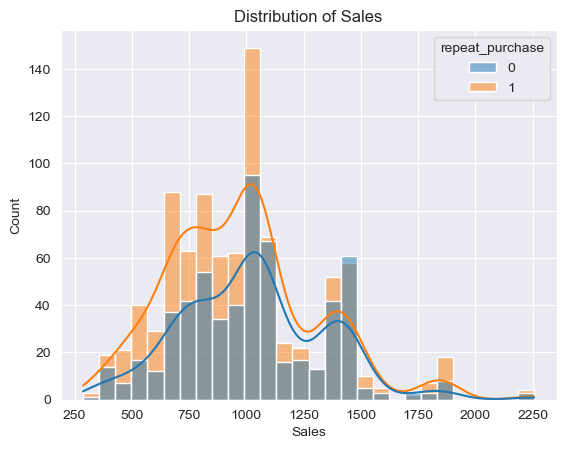

In [48]:
sns.set_style('darkgrid')
sns.histplot(x='sales', data=pet_file, kde=True, hue='repeat_purchase')
plt.xlabel('Sales')
plt.title('Distribution of Sales')
plt.show()

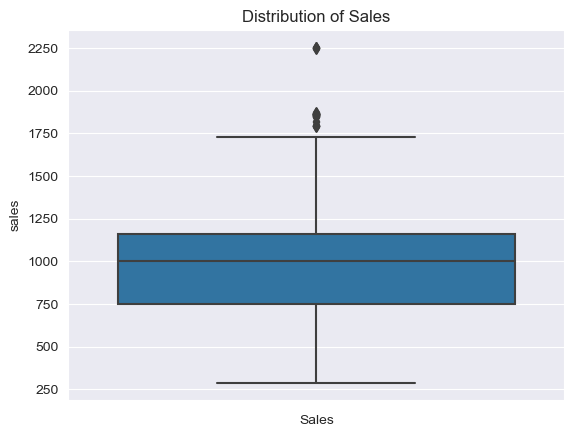

In [118]:
sns.boxplot(data=pet_file, y='sales')
# Add labels and title
plt.xlabel('Sales')
plt.title('Distribution of Sales')
plt.show()

In [117]:
pet_file['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

### Task 3 solution
As the company wants to incerase sales, it's important for them to understand the distribution of sales.As it helps to identify top-performing products, customer preferences and potential growth opportunities. 

The last year's sales records distribution is close to normal distribution and it's right-skewed. The sales distrbution's mean and median value are close. In the normal distribution we have equal mean, median and mode. There are some extreme values in the distribution which are higher than the maximum value of 2255, but overall it has normal distribution pattern with mean and median around 1000. That means the average sales for all product in teh sales records is normally distributed with an average sales value of 996.59. The tail of the distribution on the right-hand side is longer than the tail on the left-hand side. Most of the products' sales is concentrated on the left-hand side of the distribution,  with a few high sales products on the right-hand side of the distribution. In general, we can see that the sales of items which where purchased repeatedly is higher than the sales of items with one-time purchase. 

One suggestion to the sales team of PetMind could be to focus on marketing more the items which have sales more than 1000, as there is an opportunity to earn more by attracting customer to buy and repeat their purchases. And from the histogram at the above, we can see that there is a room to increase repeat purchases of the products on the right-hand side of the sales distribution with sales more than 1000. On the left side of the mean 1000, the number of sales with repeat purchase is way more higher than the one-time purchase items. And on the right side of the mean there is still way to increase sales by increasing repeat purchases.

# Task 4
## Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship.

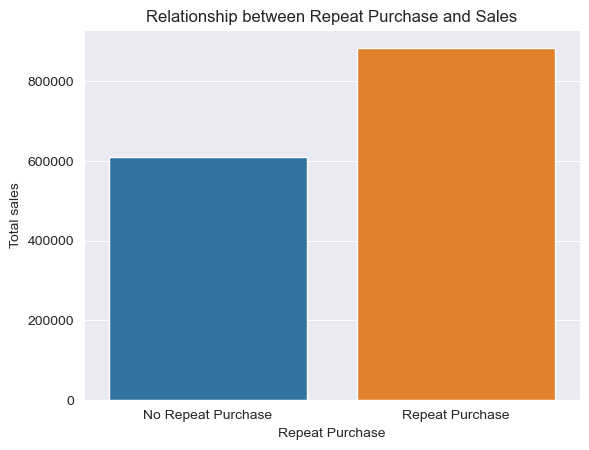

In [138]:
# Group the data nu repeat purchase and caculate the total sales for each group 
sales_by_repeat_purchase = pet_file.groupby('repeat_purchase')['sales'].sum()

sns.barplot(data=pet_file, x=sales_by_repeat_purchase.index, y=sales_by_repeat_purchase.values)
plt.xticks([0, 1], ['No Repeat Purchase', 'Repeat Purchase'])
plt.xlabel('Repeat Purchase')
plt.ylabel('Total sales')
plt.title('Relationship between Repeat Purchase and Sales')

plt.show()


### Task 4 solution
Now, to check the relationship between sales and repeat purchases we combine this two variables in a single visualization. This way we can  see the how repeat purcahse affects sales of a product. 

To see the relationship between these variables, I created a bar plot. To create it, we needed to group sales data by variable repeat purchase and calculate total sales. As a result we got a bar plot that shows total sales of items with repeat purchases and without repeat purcases. It's clear from the visualization, that the products which are bought repeatedly by customers have higher sales. It can be said that there is a positive relationship between reppeat purchases and sales. Thus, PetMind might consider continuing their strategy of increasing sales by seling more everyday products repeatedly. I personally suggest to do the same marketing efforts or promotions for all other category products as it's done for products from "equipment" category.


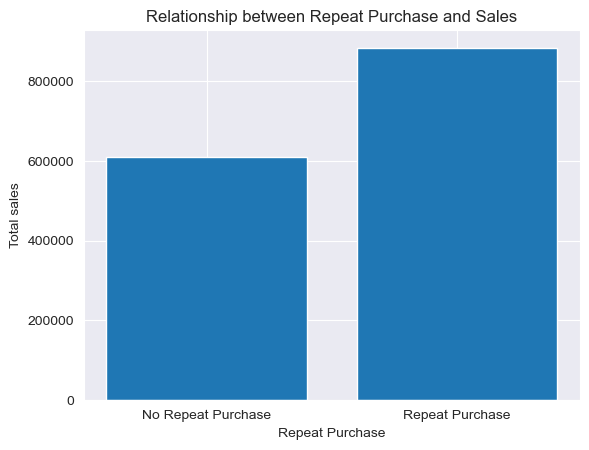

In [140]:
sales_by_repeat_purchase = pet_file.groupby('repeat_purchase')['sales'].sum()

plt.bar(sales_by_repeat_purchase.index, sales_by_repeat_purchase.values)
plt.xticks([0, 1], ['No Repeat Purchase', 'Repeat Purchase'])
plt.xlabel('Repeat Purchase')
plt.ylabel('Total sales')
plt.title('Relationship between Repeat Purchase and Sales')

plt.show()

## This plot allows us to see the relationship between repeat purchase and sales, and also understand how much each group contributes to the overall sales. It can be useful to identify whether repeat purchases have a significant impact on sales, or whether most of the sales come from one-time customers.

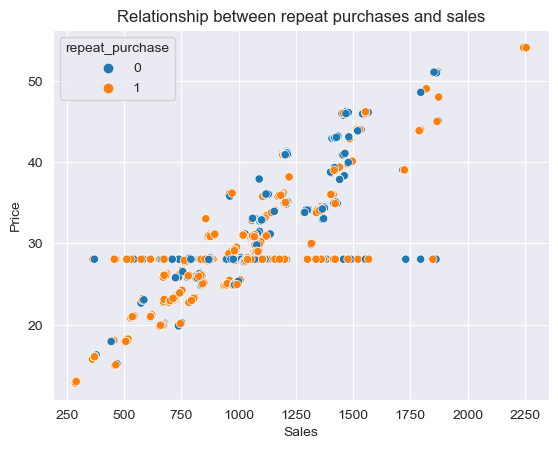

In [125]:
sns.scatterplot(x='sales', y='price', data=pet_file, hue='repeat_purchase')
plt.xlabel('Sales')
plt.ylabel('Price')
plt.title('Relationship between repeat purchases and sales')
plt.show()

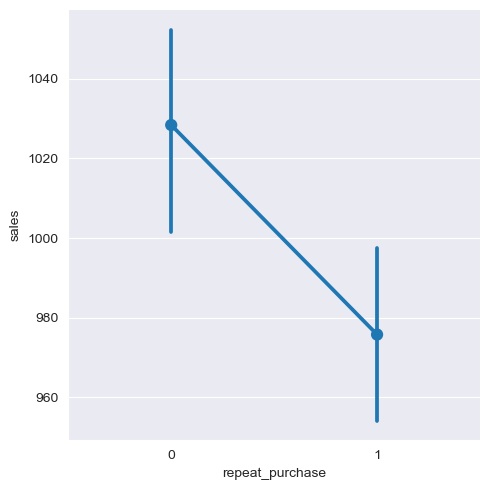

In [129]:
g=sns.catplot(x='repeat_purchase',
            y='sales',
            data=pet_file,
            kind='point')
            #hue='feel_masculine') #omitting the outliers using 'sym'  
plt.show()

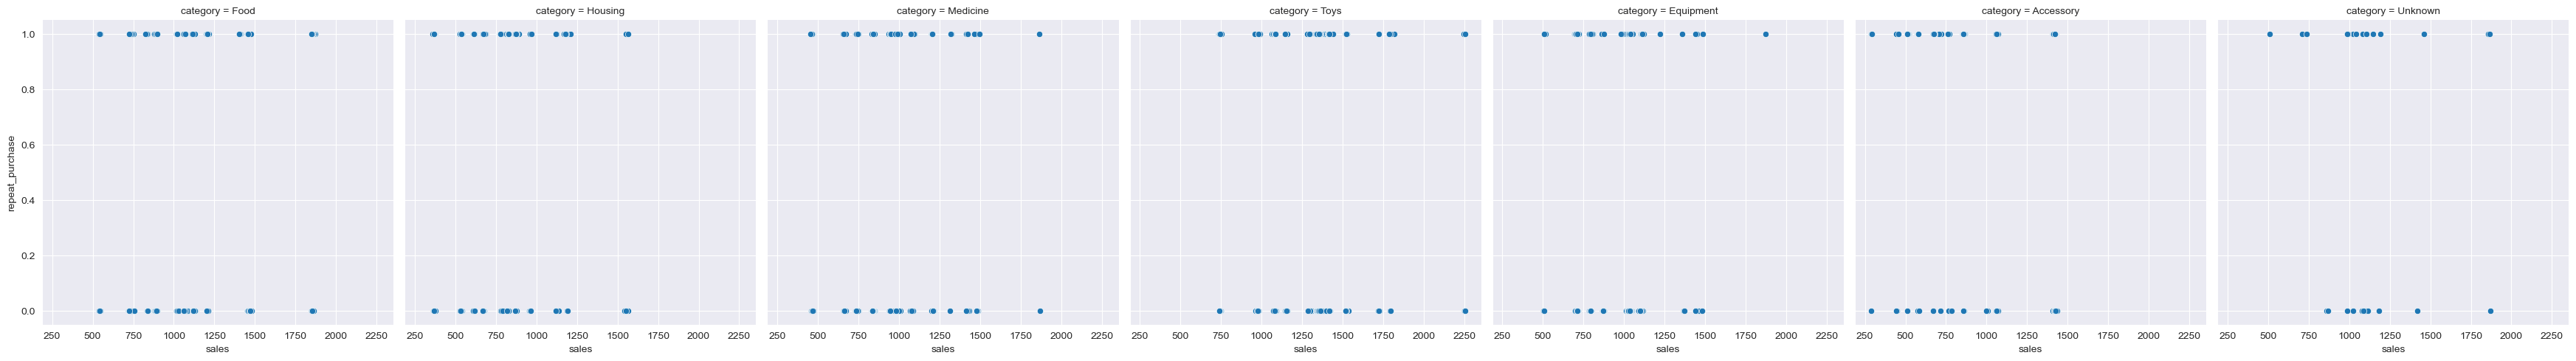

In [130]:
sns.relplot(x='sales', y='repeat_purchase',
           data=pet_file,
           kind='scatter',
           col='category') # use row="smoker" for vertical location 
plt.show()